<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP-Sentiment-Analysis-/blob/main/Tweet_Sentiment_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [58]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [68]:
neg=len(df[df['sentiment']=='negative'])
pos=len(df[df['sentiment']=='positive'])

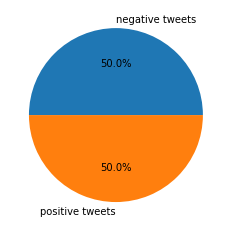

In [73]:
plt.pie([neg,pos],labels=['negative tweets','positive tweets'], autopct='%2.1f%%');

#Importing data from link:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
!mkdir  -p /root/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/kaggle.json -r /root/.kaggle/

In [ ]:
!chmod 600 ~ /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:00<00:00, 151MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!cp /content/sentiment140.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!unzip /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip -d /content/drive/MyDrive/MachineLearning/NLP

Archive:  /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip
  inflating: /content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv  


##Preparing the dataframe

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
data=pd.read_csv(path
               ,encoding='latin-1'
               )

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment', 'tweet', 'clean'], dtype='object')

In [ ]:
set(data['0'])

In [ ]:
df=pd.DataFrame()

In [ ]:
def sentiment(x):
  if x==4:
    return 'positive'
  elif x==0:
    return 'negative'

In [ ]:
df['sentiment']=data['0'].apply(lambda x: sentiment(x) )

In [ ]:
df['tweet']=data.iloc[:,5]

In [ ]:
del data

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
(set(df['sentiment']))

#Preprocessing:


##Preprocessing Tweets:

In [ ]:
df.head()

,sentiment,tweet
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  sentence=sentence.replace('{@}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['clean']=df['tweet'].apply(lambda x: preprocess(x))

In [ ]:
df.to_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [3]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [5]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [6]:
df.dropna(inplace=True)


##Preprocessing labels

In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder 

In [9]:
le=LabelEncoder()

In [10]:
y=le.fit_transform(df['sentiment'])

In [11]:
y

array([0, 0, 0, ..., 1, 1, 1])

# Word Embedding:

We make our dictionary:

In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()


In [14]:
tokenizer.fit_on_texts(list(df['clean'].values))

##Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x=df['clean'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle = True , random_state=0,stratify=y)

In [ ]:
print(len(list(tokenizer.word_index)))

564693


##Prepairing the input for embedding:

In [16]:
X_train=list(x_train)
X_test=list(x_test)
import numpy as np
from keras.preprocessing.sequence import pad_sequences
# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in x])
# Creating the padded matrices
X_train_NN = tokenizer.texts_to_sequences(X_train)
X_train_NN = pad_sequences(X_train_NN, maxlen=max_len)

X_test_NN = tokenizer.texts_to_sequences(X_test)
X_test_NN = pad_sequences(X_test_NN, maxlen=max_len)

In [ ]:
print(X_train_NN.shape)
print(X_test_NN.shape)

(1199366, 33)
(399789, 33)


In [17]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

564694


In [18]:
max_length=X_train_NN.shape[1]
print(max_length)

33


#Model

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Dense,  Flatten, MaxPooling1D, Conv1D, Dropout


In [21]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(Dropout(.001))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(.001))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 33, 100)           56469400  
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 32)            25632     
                                                                 
 dropout_1 (Dropout)         (None, 26, 32)            0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 416)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                4170      
                                                      

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(X_train_NN, y_train, epochs=3, batch_size=800,validation_split=.2)


In [25]:
model.save('/content/drive/MyDrive/MachineLearning/NLP/embedding_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/embedding_1/assets


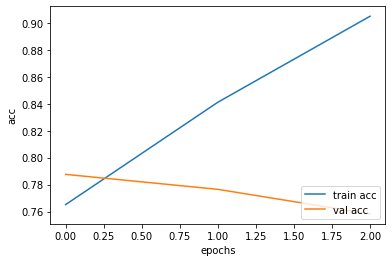

In [26]:
plt.plot(hist.history['accuracy'],label='train acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show();

#Score:

In [ ]:
pred=model.predict(X_test_NN)


In [44]:
pred=pred.reshape(pred.shape[0])

In [80]:
def step(x):
  if x>.5:
    return 1
  elif x<.5:
    return 0

In [86]:

y_pred=list(map(step, pred))


In [87]:
set(y_pred)

{0, 1}

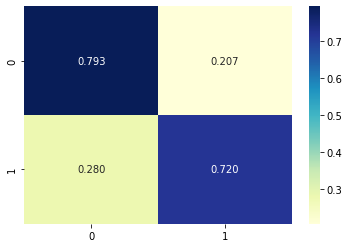

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')
sn.heatmap(cm, annot=True, fmt='2.3f', cmap='YlGnBu')

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test, y_pred)

0.7566791482507023